In [3]:
import numpy as np
import os
import re
import tifffile
from IPython.display import display
import PIL.Image
import time
%matplotlib inline

def show_fig(ar_fig):
    display(PIL.Image.fromarray(ar_fig))
    time.sleep(1)
    return
    kwargs_fig = dict(
        dpi = 300,
    )
    kwargs_subplots = dict(
        xticks = [],
        yticks = [],
    )
    fig, ax = plt.subplots(subplot_kw=kwargs_subplots, **kwargs_fig)
    ax.imshow(ar_fig, cmap='gray')
    plt.show()
    plt.close(fig)

def to_uint8(ar, val_min, val_max):
    ar_new = ar.copy()
    if val_min is not None: ar_new[ar_new < val_min] = val_min
    if val_max is not None: ar_new[ar_new > val_max] = val_max
    ar_new -= np.min(ar_new)
    ar_new = ar_new/np.max(ar_new)*256.0
    ar_new[ar_new >= 256.0] = 255.0
    return ar_new.astype(np.uint8)

def add_scale_bar(width, um_per_pixel, **kwargs):
    """
    width - bar width in microns
    px_per_um
    """
    pass

z_slices: [5, 10, 16, 21, 26]
img_test_00_prediction.tif
(32, 224, 320) float32 -0.919271 7.30273
img_test_00_signal.tif
(32, 224, 320) float32 -10.0687 13.2446
img_test_00_target.tif
(32, 224, 320) float32 -3.07063 27.9185


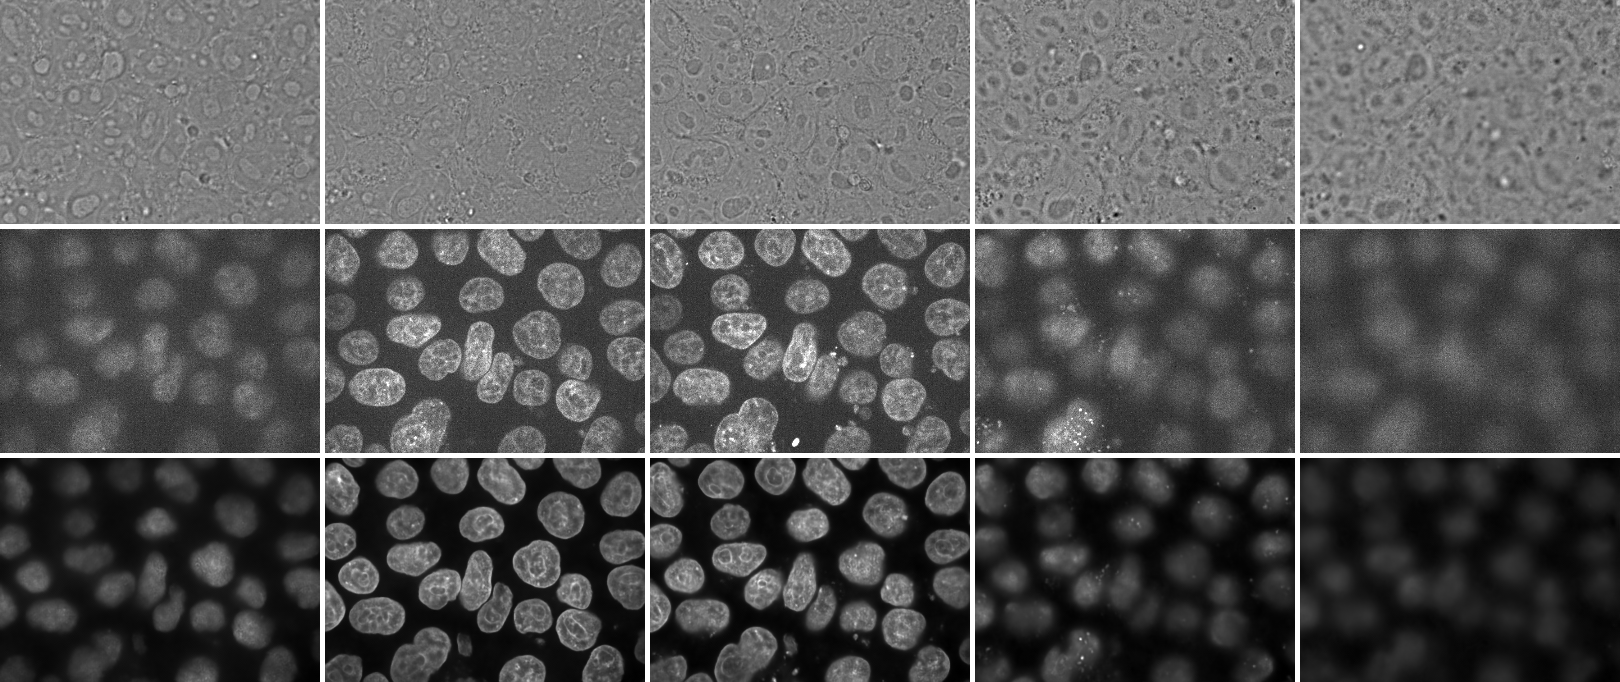

img_test_01_prediction.tif
(32, 224, 320) float32 -0.917363 12.8486
img_test_01_signal.tif
(32, 224, 320) float32 -8.14644 6.19768
img_test_01_target.tif
(32, 224, 320) float32 -3.27093 15.2525


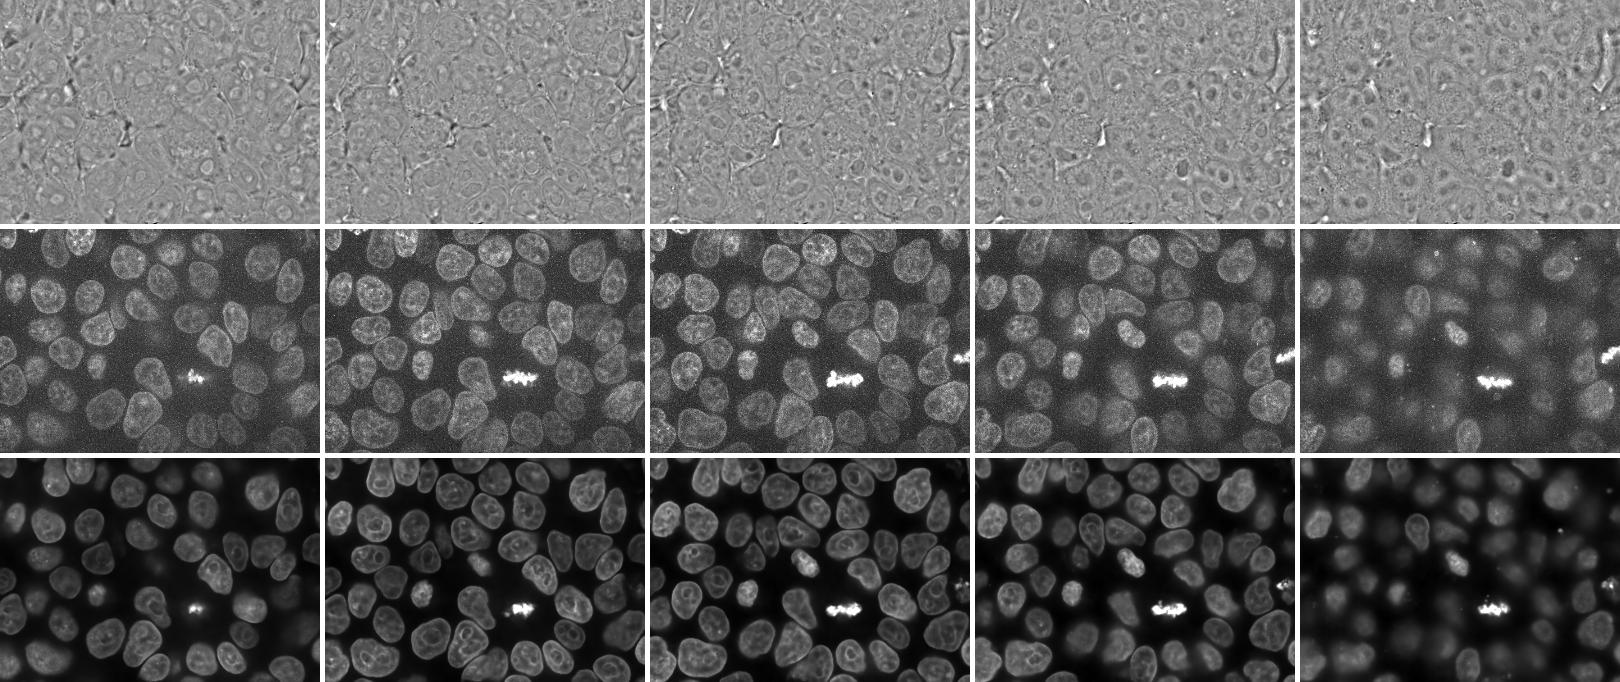

img_test_02_prediction.tif
(32, 224, 320) float32 -0.915335 14.7538
img_test_02_signal.tif
(32, 224, 320) float32 -9.9494 9.52042
img_test_02_target.tif
(32, 224, 320) float32 -2.80098 12.8724


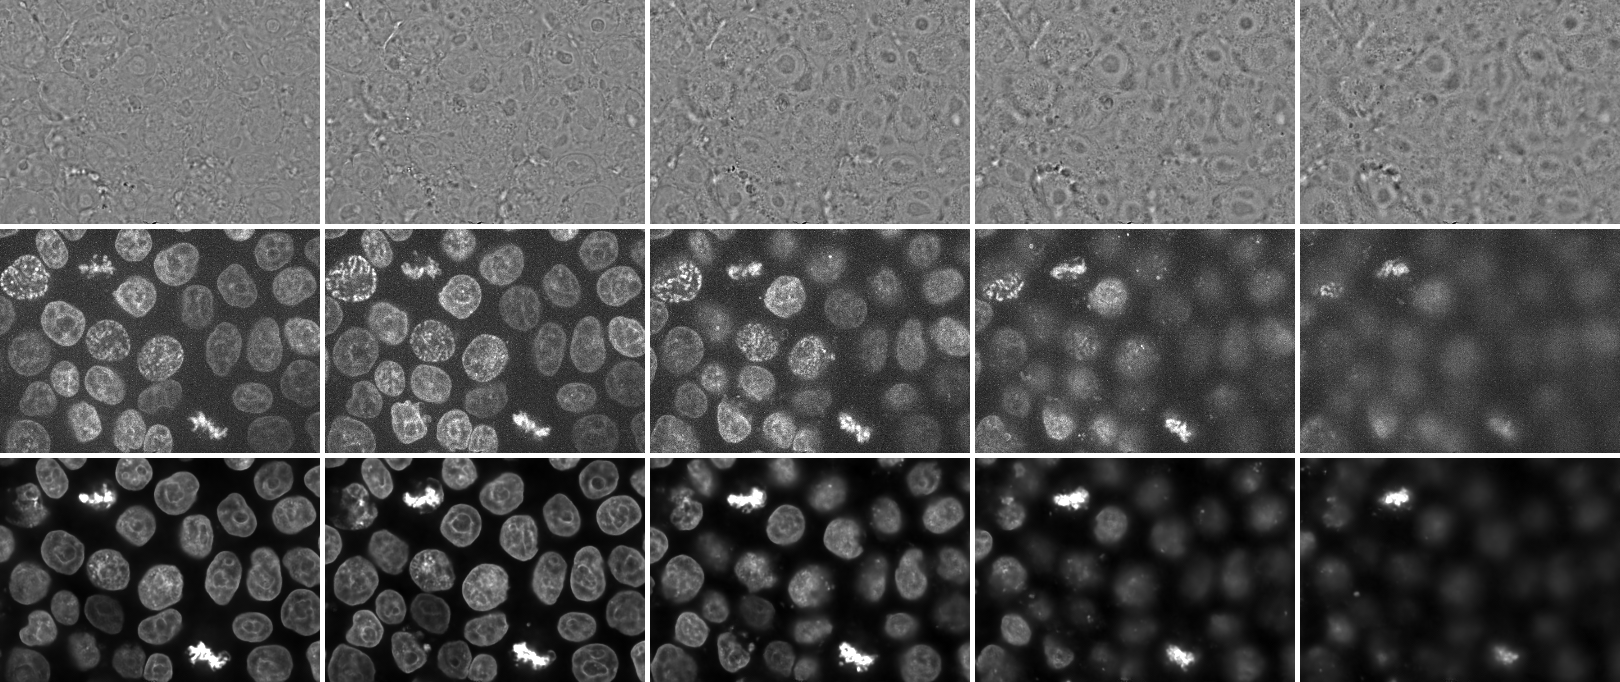

img_test_03_prediction.tif
(32, 224, 320) float32 -1.01981 6.54682
img_test_03_signal.tif
(32, 224, 320) float32 -8.89694 10.4317
img_test_03_target.tif
(32, 224, 320) float32 -3.05565 17.1254


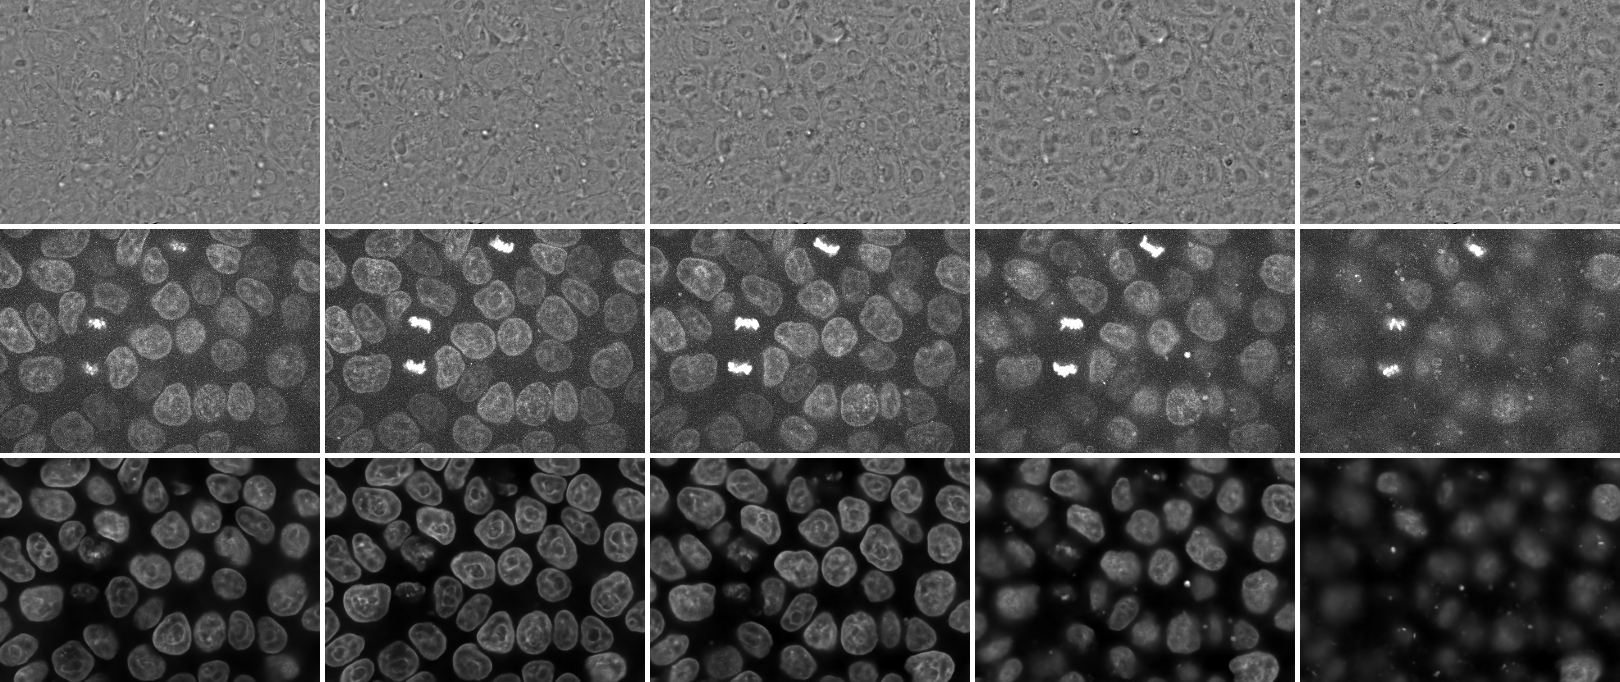

img_test_04_prediction.tif
(32, 224, 320) float32 -1.02788 14.1297
img_test_04_signal.tif
(32, 224, 320) float32 -12.3891 10.4213
img_test_04_target.tif
(32, 224, 320) float32 -2.97374 13.2219


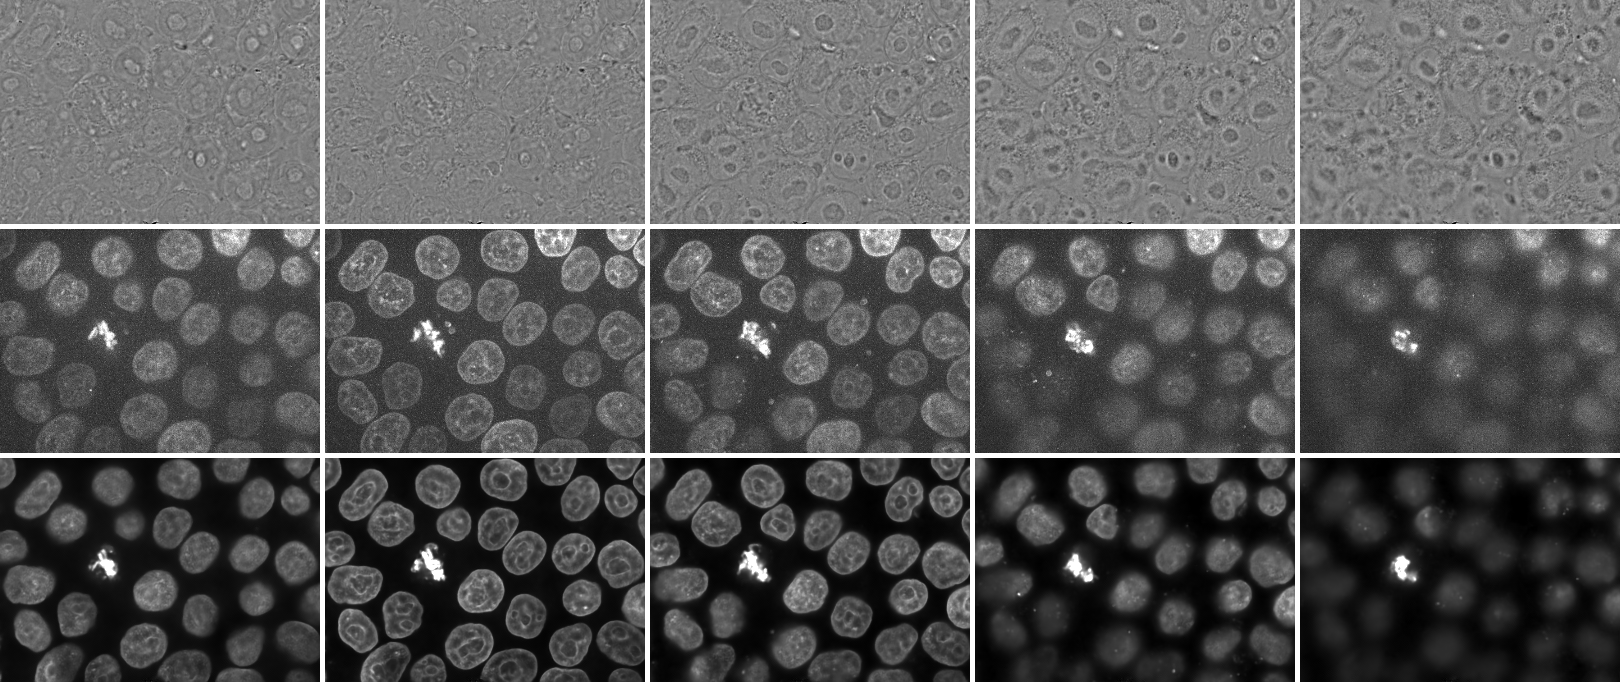

In [5]:
path_source = '../saved_models/ttf_bf_dna_no_relu/outputs'
tags_signal = ['signal', 'bright']
tags_target = ['target', 'DNA']
tags_prediction = ['prediction']

paths_tifs = sorted([i.path for i in os.scandir(path_source) if i.is_file() and i.path.lower().endswith('.tif')])
pattern = re.compile(r'_(\d+)_')

n_images = 5
n_z_per_img = 5
padding_h = 5
padding_v = 5
shape_z = 32

val_range_signal = (-10, 10)
#val_range_target = (-3, 8)
#val_range_prediction = (-1, 5)
val_range_target = (-3, 7)
val_range_prediction = (-0.9, 6)

z_indices = [int((i + 1)*(shape_z/(n_z_per_img + 1))) for i in range(n_z_per_img)]
print('z_slices:', z_indices)

idx_old = None
count_images = 0
for i, path in enumerate(paths_tifs):
    idx_row = None
    path_basename = os.path.basename(path)
    print(path_basename)
    match = pattern.search(path_basename)
    idx_img = match.groups()[0]
    if any(tag in path_basename for tag in tags_signal):
        idx_row = 0
        val_min, val_max = val_range_signal
    if any(tag in path_basename for tag in tags_target):
        idx_row = 1
        val_min, val_max = val_range_target
    if any(tag in path_basename for tag in tags_prediction):
        idx_row = 2
        val_min, val_max = val_range_prediction
    if idx_row is not None:
        ar_pre = tifffile.imread(path)
        print(ar_pre.shape, ar_pre.dtype, np.min(ar_pre), np.max(ar_pre))
        ar = to_uint8(ar_pre, val_min, val_max)
        if idx_img != idx_old:
            n_rows_done = 0
            idx_old = idx_img
            shape = (ar.shape[1]*3 + 2*padding_v, ar.shape[2]*n_z_per_img + (n_z_per_img - 1)*padding_h)
            ar_fig = np.ones(shape, dtype=np.uint8)*255
        offset_y = idx_row*(ar.shape[1] + padding_v)
        for idx_col, z_index in enumerate(z_indices):
            offset_x = idx_col*(ar.shape[2] + padding_h)
            ar_fig[offset_y:offset_y + ar.shape[1], offset_x:offset_x + ar.shape[2]] = ar[z_index, ]
        n_rows_done += 1
        if n_rows_done == 3:
            show_fig(ar_fig)
            count_images += 1
    if count_images >= n_images:
        break